### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#  Import and read the charity_data.csv.
application_df = pd.read_csv("charity_data.csv")
application_df.head()

2023-02-27 00:31:40.578639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME', 'ASK_AMT'], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique().sort_values(ascending=False)
print(unique_counts)

CLASSIFICATION            71
APPLICATION_TYPE          17
INCOME_AMT                 9
AFFILIATION                6
USE_CASE                   5
ORGANIZATION               4
STATUS                     2
SPECIAL_CONSIDERATIONS     2
IS_SUCCESSFUL              2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
print(application_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


<AxesSubplot: ylabel='Density'>

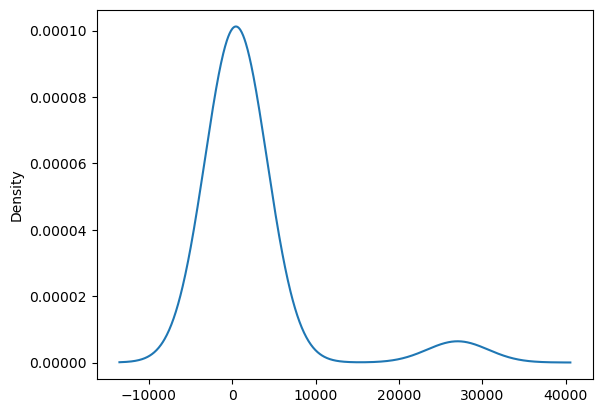

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


<AxesSubplot: ylabel='Density'>

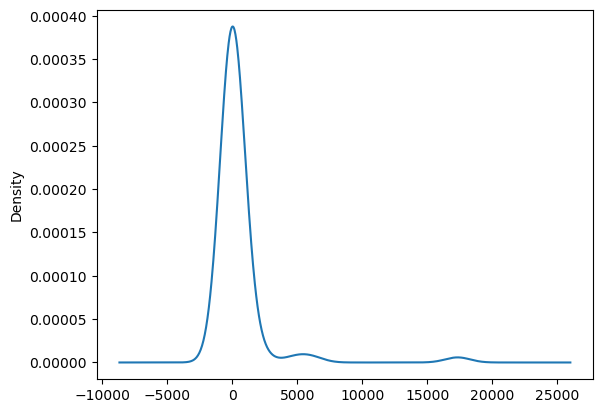

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [10]:
# Look at INCOME_AMT value counts for binning
income_counts = application_df.INCOME_AMT.value_counts()
print(income_counts)

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64


In [11]:
# Add values to categories, using the same logic of the original variable
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace({'0': 0 ,'1-9999': 1, '10000-24999': 2, '25000-99999':3,
                                                      '100000-499999':4, '1M-5M': 5, '5M-10M': 6,
                                                      '10M-50M': 7, '50M+': 8})

In [12]:
# Look at SPECIAL_CONSIDERATIONS value counts for binning
special_considerations_counts = application_df.SPECIAL_CONSIDERATIONS.value_counts()
print(special_considerations_counts)

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64


In [13]:
# Add values to categories, using the same logic of the original variable
application_df['SPECIAL_CONSIDERATIONS'] = application_df['SPECIAL_CONSIDERATIONS'].replace({'N': 0,'Y': 1})

In [14]:
# Look at ORGANIZATION value counts for binning
organizaction_counts = application_df.ORGANIZATION.value_counts()
print(organizaction_counts)

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64


In [15]:
# Add values to categories, using the same logic of the original variable
application_df['ORGANIZATION'] = application_df['ORGANIZATION'].replace({'Trust': 1 ,'Association': 2, 'Co-operative': 3, 'Corporation': 4})

In [16]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
print(application_counts)

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64


In [17]:
# Generate our categorical variable lists
application_cat = application_df.select_dtypes(include=['object']).columns.tolist()

# print the list of categorical columns
print(application_cat)

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE']


In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
# drop the original categorical features from the DataFrame
application_df = application_df.drop(application_cat, axis=1)

# concatenate the encoded DataFrame with the original DataFrame
application_df = pd.concat([application_df, encode_df], axis=1)
application_df.head()

,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,2,1,0,0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,1,1,0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,0,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,2,0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,4,0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
# assign the target variable to y
y = application_df.pop('IS_SUCCESSFUL').values

# assign the feature matrix to X
X = application_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#1

nn = tf.keras.models.Sequential([
    Dense(100, input_dim=X.shape[1], activation='relu'),
    Dense(80, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')])
#2    
#nn  = Sequential([
    #Dense(100, input_dim=X.shape[1]),
    #BatchNormalization(),
    #Activation('relu'),
    #Dense(80),
    #BatchNormalization(),
    #Activation('relu'),
    #Dense(50),
    #BatchNormalization(),
    #Activation('relu'),
    #Dense(1, activation='sigmoid')
#])

#3
    
#nn = Sequential([
    #Dense(100, input_dim=X.shape[1]),
    #Activation('relu'),
    #Dropout(0.2),
    #Dense(80),
    #Activation('relu'),
    #Dropout(0.2),
    #Dense(50),
    #Activation('relu'),
    #Dropout(0.2),
    #Dense(1, activation='sigmoid')
#])

#4

# Define a function that creates a model with given hyperparameters
#def create_model(learning_rate, batch_size, num_hidden_layers, num_hidden_units):
    #nn = Sequential()
    #nn.add(Dense(num_hidden_units, input_dim=X.shape[1], activation='relu'))
    #for i in range(num_hidden_layers):
        #nn.add(Dense(num_hidden_units, activation='relu'))
    #nn.add(Dense(1, activation='sigmoid'))
    #optimizer = tf.keras.optim
    
# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               2800      
                                                                 
 dense_13 (Dense)            (None, 80)                8080      
                                                                 
 dense_14 (Dense)            (None, 50)                4050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14,981
Trainable params: 14,981
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# Train the model
# Define the checkpoint filename
checkpoint_path = "weights.{epoch:02d}.h5"

# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

# Train the model with the checkpoint callback
history = nn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback]
)

Epoch 1/100
804/804 [==============================] - 1s 688us/step - loss: 0.5370 - accuracy: 0.7389 - val_loss: 0.5938 - val_accuracy: 0.7258
Epoch 2/100
804/804 [==============================] - 1s 669us/step - loss: 0.5368 - accuracy: 0.7391 - val_loss: 0.5928 - val_accuracy: 0.7258
Epoch 3/100
804/804 [==============================] - 1s 675us/step - loss: 0.5367 - accuracy: 0.7389 - val_loss: 0.5959 - val_accuracy: 0.7261
Epoch 4/100
804/804 [==============================] - 1s 726us/step - loss: 0.5372 - accuracy: 0.7384 - val_loss: 0.5944 - val_accuracy: 0.7261
Epoch 5/100
804/804 [==============================] - 1s 715us/step - loss: 0.5371 - accuracy: 0.7387 - val_loss: 0.5928 - val_accuracy: 0.7258
Epoch 6/100
804/804 [==============================] - 1s 723us/step - loss: 0.5377 - accuracy: 0.7383 - val_loss: 0.5965 - val_accuracy: 0.7254
Epoch 7/100
804/804 [==============================] - 1s 698us/step - loss: 0.5371 - accuracy: 0.7385 - val_loss: 0.5984 - val_ac

804/804 [==============================] - 1s 708us/step - loss: 0.5367 - accuracy: 0.7391 - val_loss: 0.5960 - val_accuracy: 0.7256
Epoch 57/100
804/804 [==============================] - 1s 679us/step - loss: 0.5365 - accuracy: 0.7393 - val_loss: 0.6017 - val_accuracy: 0.7261
Epoch 58/100
804/804 [==============================] - 1s 710us/step - loss: 0.5368 - accuracy: 0.7390 - val_loss: 0.6028 - val_accuracy: 0.7251
Epoch 59/100
804/804 [==============================] - 1s 699us/step - loss: 0.5373 - accuracy: 0.7385 - val_loss: 0.5923 - val_accuracy: 0.7263
Epoch 60/100
804/804 [==============================] - 1s 707us/step - loss: 0.5365 - accuracy: 0.7390 - val_loss: 0.5989 - val_accuracy: 0.7264
Epoch 61/100
804/804 [==============================] - 1s 704us/step - loss: 0.5364 - accuracy: 0.7384 - val_loss: 0.6022 - val_accuracy: 0.7262
Epoch 62/100
804/804 [==============================] - 1s 695us/step - loss: 0.5364 - accuracy: 0.7390 - val_loss: 0.6044 - val_accuracy

In [52]:
#1

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 71.8272 - accuracy: 0.6526 - 107ms/epoch - 401us/step
Loss: 71.82717895507812, Accuracy: 0.6525947451591492


In [34]:
#2

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.3167 - accuracy: 0.5778 - 119ms/epoch - 445us/step
Loss: 1.3167461156845093, Accuracy: 0.5778425931930542


In [38]:
#3

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.5813 - accuracy: 0.6427 - 109ms/epoch - 406us/step
Loss: 2.5812904834747314, Accuracy: 0.6426821947097778


In [46]:
# Save the model to a file
nn.save('AlphabetSoupCharity_Optimization.h5')

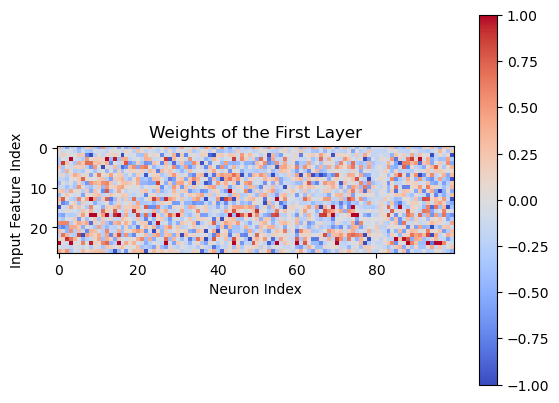

In [47]:
###IGNORE
##FUTURE ANALYSIS

# get the weights from the first layer
weights = nn.layers[0].get_weights()[0]

# plot the weights
fig, ax = plt.subplots()
im = ax.imshow(weights, cmap='coolwarm', vmin=-1, vmax=1)
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_title('Weights of the First Layer')
ax.set_xlabel('Neuron Index')
ax.set_ylabel('Input Feature Index')
plt.show()

In [48]:
###IGNORE
##FUTURE ANALYSIS

from keras.models import Sequential
from keras.layers import Dense

# define the model architecture
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# create the estimator
estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# fit the estimator
estimator.fit(X_train, y_train)

# calculate feature importance
result = permutation_importance(estimator, X_test, y_test, n_repeats=10, random_state=42)

# extract feature importance scores
importance = result.importances_mean

# print feature importance scores
for i,v in enumerate(importance):
    print('Feature %0d: %.5f' % (i,v))

NameError: name 'KerasClassifier' is not defined